In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('machine.data',header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
col_names = ['Vendor Name','Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH','CHMIN', 'CHMAX', 'PRP', 'ERP' ]

df.columns = col_names

In [4]:
df.head()

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


### Exploratory Data Analysis

In [5]:
df.shape

(209, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor Name  209 non-null    object
 1   Model Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [7]:
df['Vendor Name'].value_counts()

Vendor Name
ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
ipl              6
magnuson         6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
basf             2
apollo           2
microdata        1
four-phase       1
sratus           1
adviser          1
Name: count, dtype: int64

In [8]:
df['Model Name'].value_counts()

Model Name
32/60     1
38/7      1
m80/32    1
m80/42    1
m80/43    1
         ..
100       1
300       1
500       1
600       1
vs-90     1
Name: count, Length: 209, dtype: int64

Model Name is a unique identifier for each of the computer models. So, we should not use this column for model building.

PRP denotes published relative performance. Our target is to predict estimated relative performance. So, we should delete PRP from the dataframe. 

In [9]:
cor=df.corr(numeric_only=True)
cor

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
MYCT,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396
MMIN,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292
MMAX,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202
CACH,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620
CHMIN,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580
CHMAX,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156
PRP,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472
ERP,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000


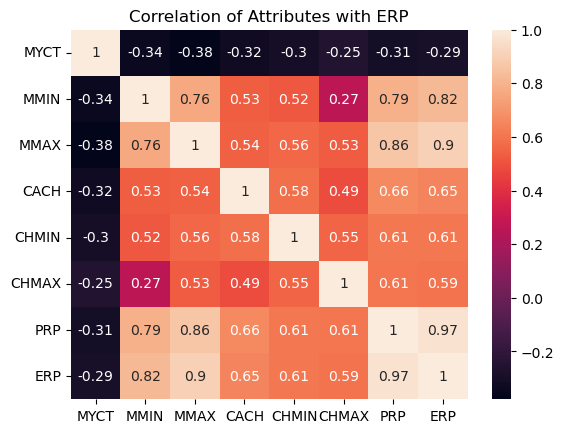

In [10]:
sns.heatmap(cor, annot=True)
plt.title('Correlation of Attributes with ERP')
plt.show()

In [11]:
df.isnull().sum()

Vendor Name    0
Model Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [12]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [16]:
# outlies in discrete variables % of observations

for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    print(df[var].value_counts() / (len(df)))
    print()

MYCT
50      0.119617
140     0.043062
26      0.038278
300     0.038278
56      0.033493
320     0.033493
38      0.033493
180     0.033493
200     0.028708
75      0.028708
105     0.028708
800     0.028708
143     0.023923
160     0.023923
900     0.023923
110     0.019139
25      0.019139
29      0.019139
23      0.019139
60      0.019139
400     0.019139
115     0.014354
100     0.014354
225     0.014354
250     0.014354
92      0.014354
30      0.014354
125     0.014354
480     0.014354
330     0.014354
57      0.009569
1500    0.009569
59      0.009569
240     0.009569
133     0.009569
72      0.009569
810     0.009569
700     0.009569
40      0.009569
17      0.009569
1100    0.009569
84      0.004785
124     0.004785
116     0.004785
203     0.004785
70      0.004785
52      0.004785
175     0.004785
350     0.004785
167     0.004785
112     0.004785
185     0.004785
64      0.004785
48      0.004785
35      0.004785
600     0.004785
90      0.004785
220     0.004785
150     0

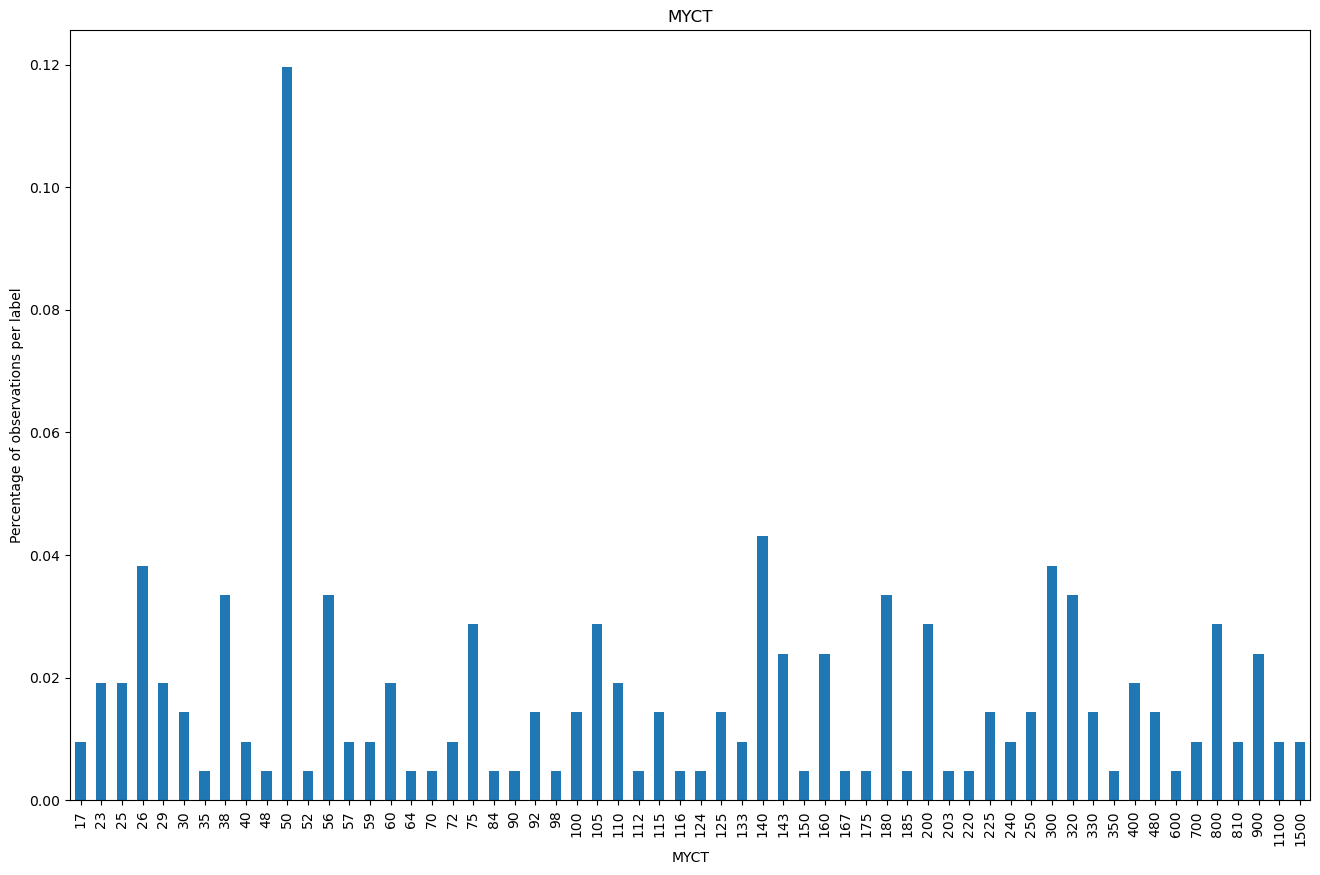

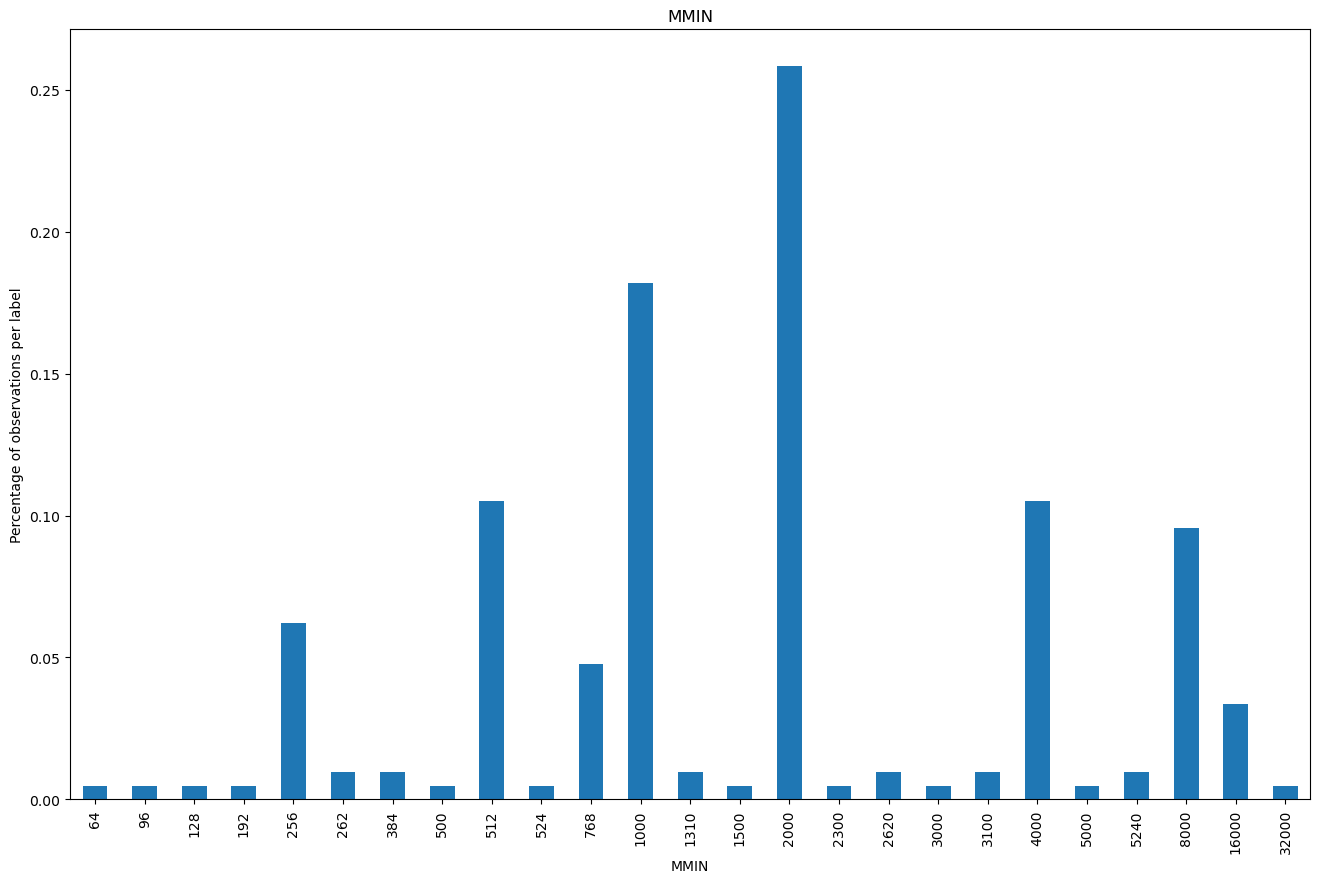

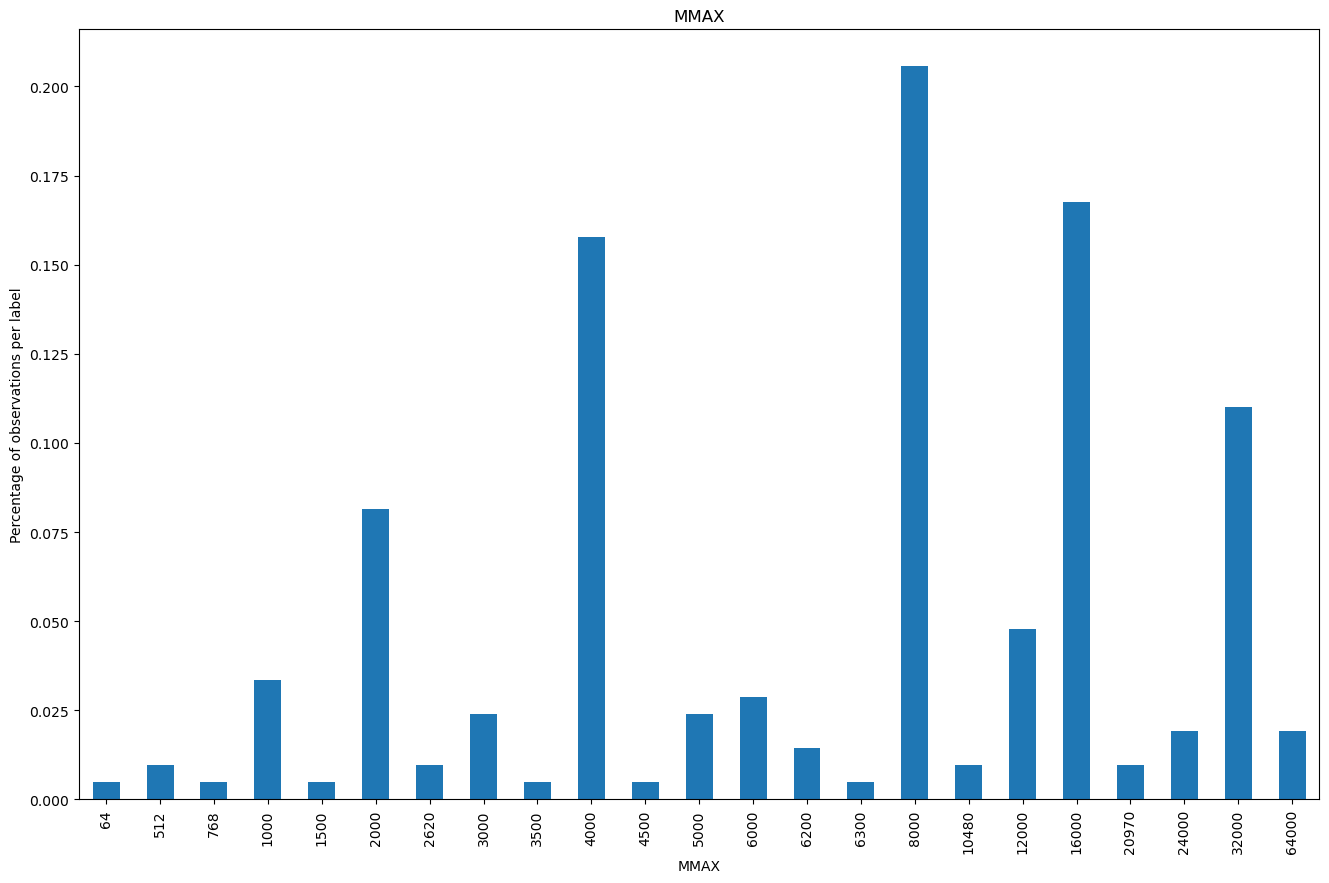

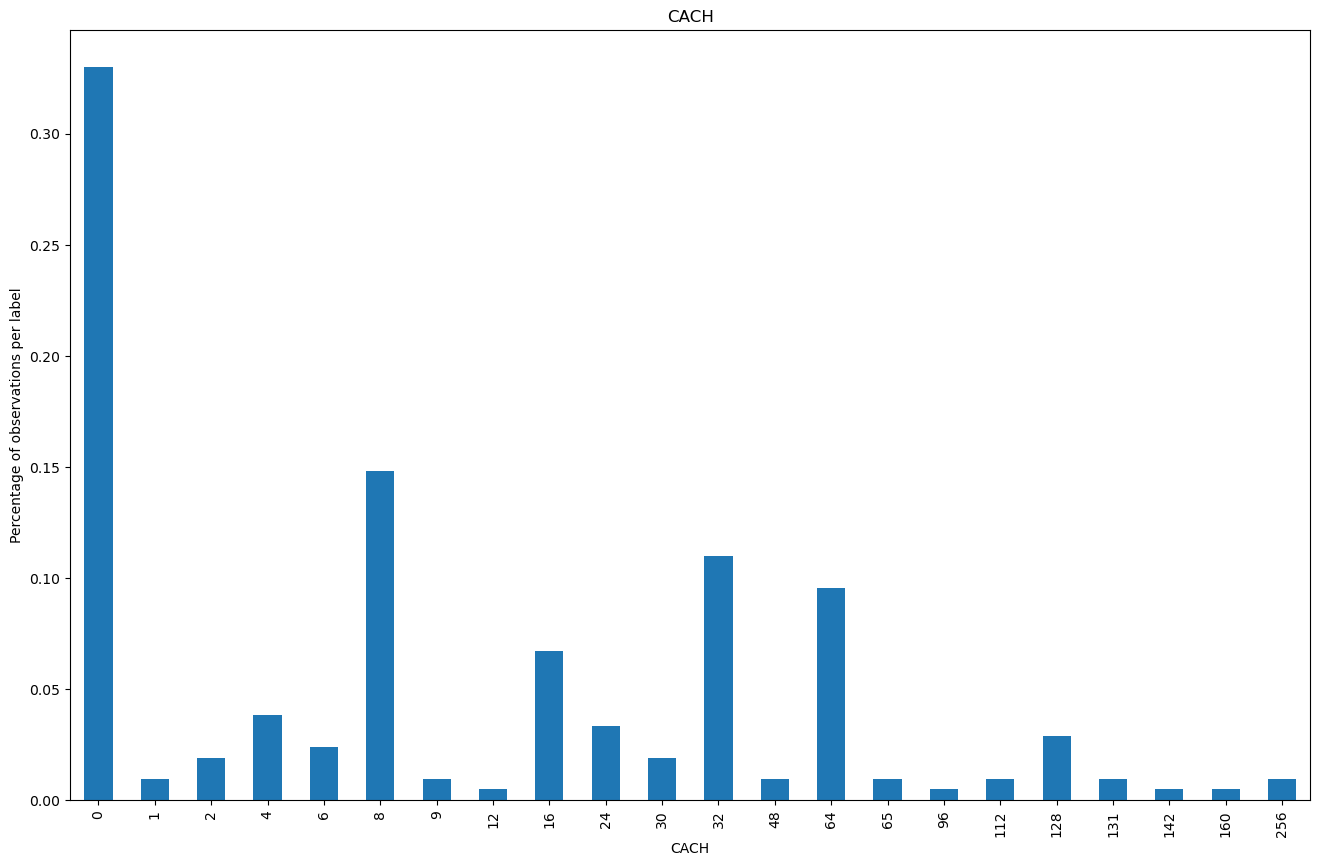

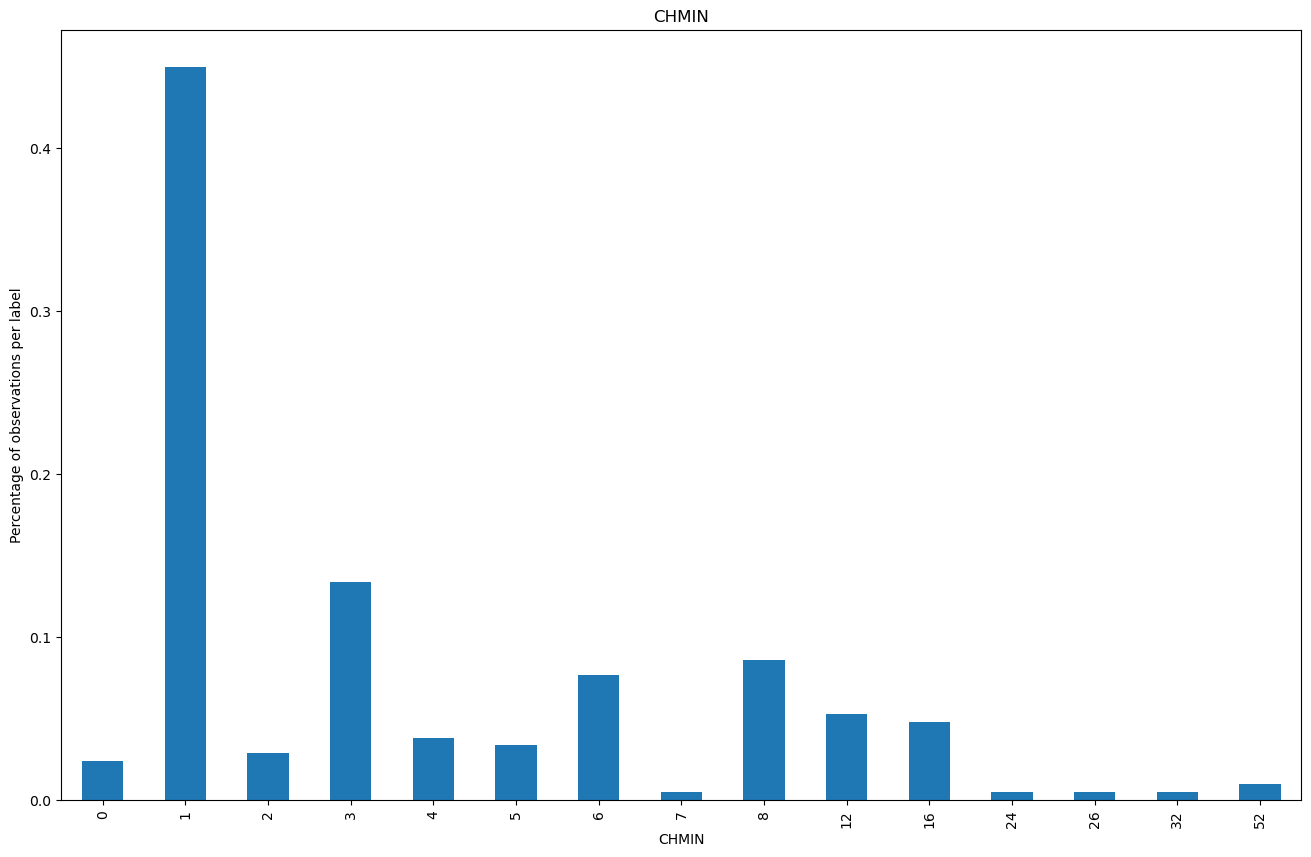

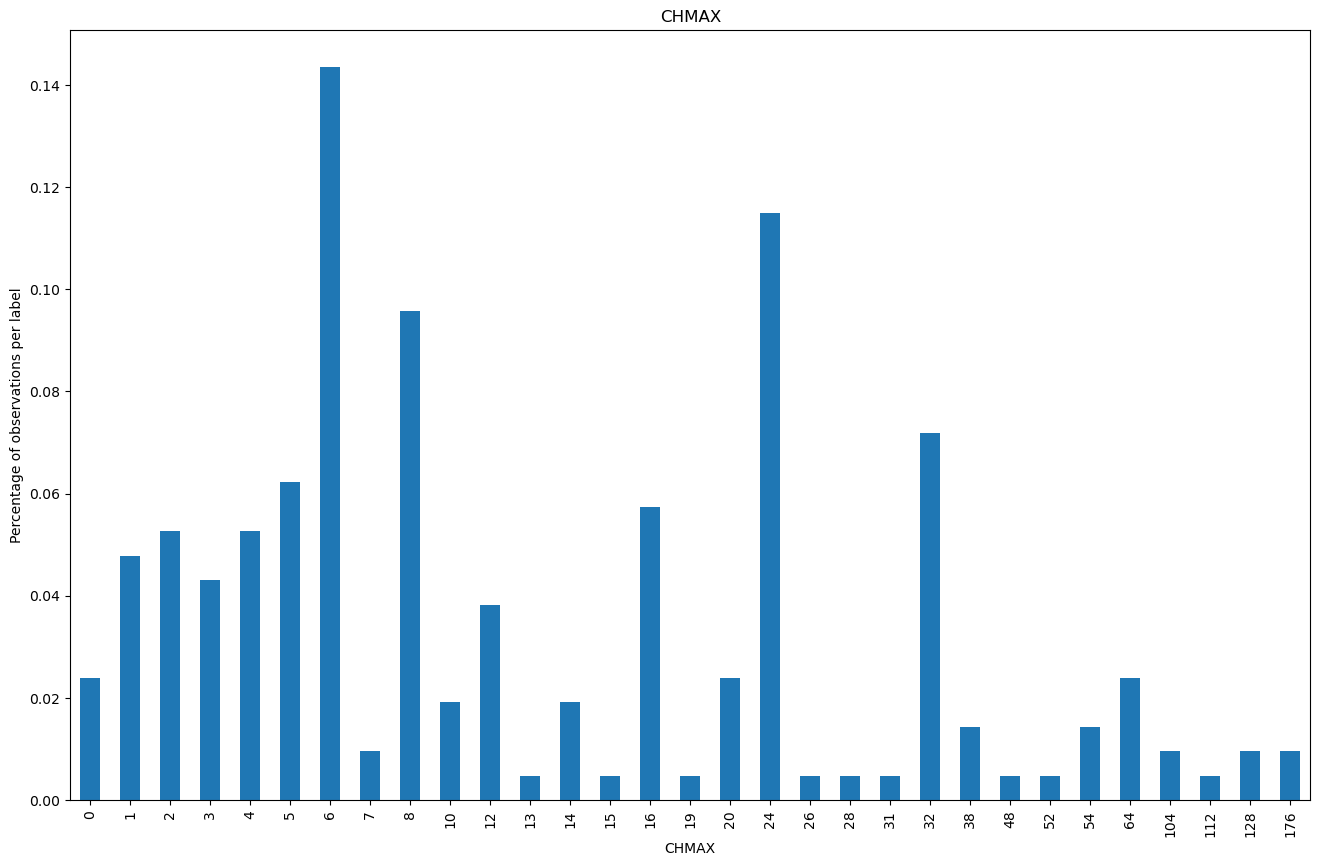

In [22]:
for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / (len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

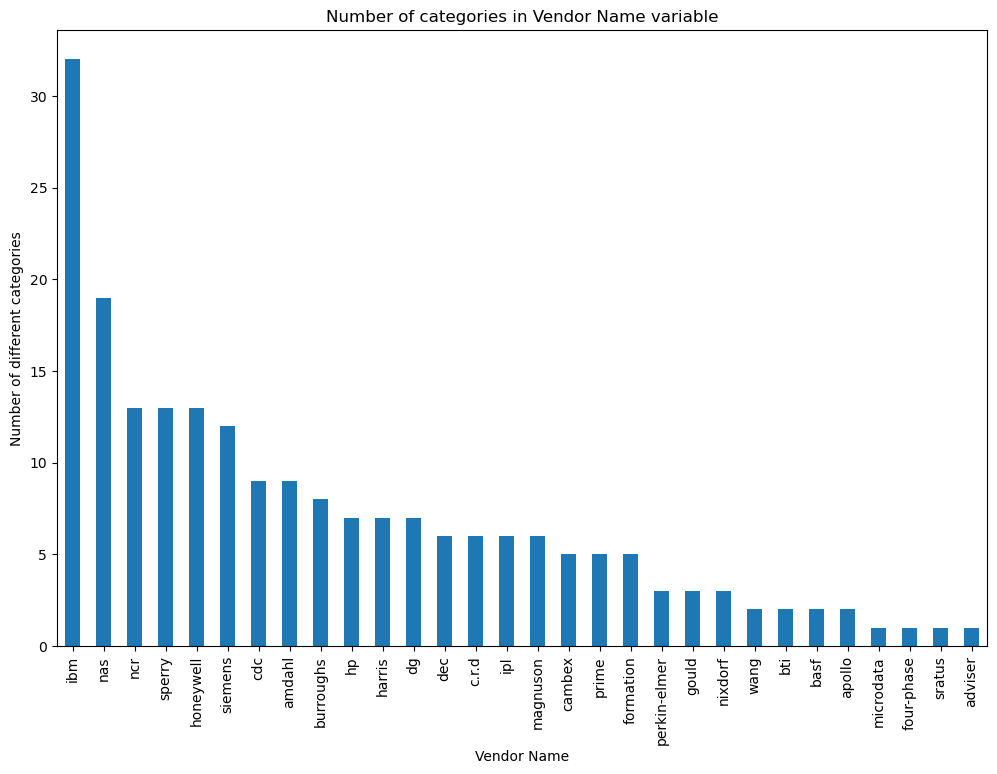

In [23]:
# plot the categorical variable

plt.figure(figsize=(12,8))
(df['Vendor Name'].value_counts()).plot.bar()
plt.title('Number of categories in Vendor Name variable')
plt.xlabel('Vendor Name')
plt.ylabel('Number of different categories')
plt.show()

In [25]:
# Divide the dataset into categorical and numerical variables

df_cat = df.iloc[:,:2]

df_num = df.iloc[:, 2:]

In [26]:
df_cat

,Vendor Name,Model Name
0,adviser,32/60
1,amdahl,470v/7
2,amdahl,470v/7a
3,amdahl,470v/7b
4,amdahl,470v/7c
...,...,...
204,sperry,80/8
205,sperry,90/80-model-3
206,sratus,32
207,wang,vs-100


In [28]:
df_num.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


In [29]:
X = df_num.iloc[:,0:6]

y = df_num.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [32]:
X_train.shape, y_train.shape

((146, 6), (146,))

In [33]:
X_test.shape, y_test.shape

((63, 6), (63,))

### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Predicting the results

In [38]:
y_pred = lr.predict(X_test)
y_pred

array([ 53.25899879,  -7.30914167,  85.61134478, 333.46353054,
        88.17105392, -16.58129332,  92.52796135,  53.8453543 ,
       266.93488421, 197.13339895,  26.12367068, 521.67728638,
        70.27440089, 218.8743902 , 445.39038784,   6.44136356,
        27.42701247, -16.02341777, -40.97025653, -11.14771009,
       -25.83227337,  99.791943  , 455.57718867,  40.31328116,
        26.03695563,  95.11716367,  -2.61725869,  10.65043882,
       -28.67074614,  34.28080493,  75.81219309,  34.33609154,
        30.89585298, 101.03428352, 128.44097378, 105.58922964,
       -18.07256295,  49.13283719, -14.85928465,  99.73223861,
       246.11502923, 101.53746022,  -2.28180257,  39.6908657 ,
       193.38408096,  16.24970661,  99.73223861,  52.59588689,
        94.55018262,   9.87432157,   3.17893711,  -1.11130888,
       100.93320523, 388.01564587, 667.35491836,  10.34074574,
        38.80918893,  27.03972685,  86.46175062,  40.40157359,
       311.58243355,  17.36264211,  24.05834246])

In [39]:
# Predicting estimated relative CPU performance value

lr.predict(X_test)[0:5]

array([ 53.25899879,  -7.30914167,  85.61134478, 333.46353054,
        88.17105392])

In [41]:
print(f"Estimated coefficients: {lr.coef_}")

print(f"Estimated intercept: {lr.intercept_}")

Estimated coefficients: [17.70202595 59.11241774 78.35042681 16.53981449 -0.35410978 38.97256261]
Estimated intercept: 100.0


### Evaluate model performance

In [43]:
# RMSE(Root Mean Square Error)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE value : {rmse}")

RMSE value : 37.985148045282436


The RMSE value has been found to be 37.99. It means the standard deviation for our prediction is 37.99.

In [45]:
# R2 Score

from sklearn.metrics import r2_score
print(f"R2 Score value: {r2_score(y_test, y_pred)}")

R2 Score value: 0.92076066251637


R2 score value >= 0.7, then the model is good enough to deploy on unseen data because it provides good fit to the data. It means that this model explains 92% of the variance in our dependent variable.

### Overfitting Vs Underfitting

In [50]:
# Evaluating training set performance

print(f"Training set score: {lr.score(X_train, y_train)}")

Training set score: 0.9063759059069312


In [52]:
# Evaluating test set performance

print(f"Test set score: {lr.score(X_test, y_test)}")

Test set score: 0.92076066251637


Training set and test set performances are comparable. An R Square value of 0.92 is very good.

### Cross validation

In [53]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr, X, y, cv=5)
cv_scores.round(4)

array([ 0.8484, -0.864 ,  0.7149,  0.8755,  0.7707])

In [55]:
# print the avarage 5-fold cross-validation scores

print(f'Average 5-Fold CV Score: {np.mean(cv_scores).round(4)}')

Average 5-Fold CV Score: 0.4691


There is a large fluctuation in the cross validation scores of the model.

The average 5-fold cross validation score is very poor and hence the linear regression model is not a great fit to the data.

### Residual analysis

<Figure size 1000x800 with 0 Axes>

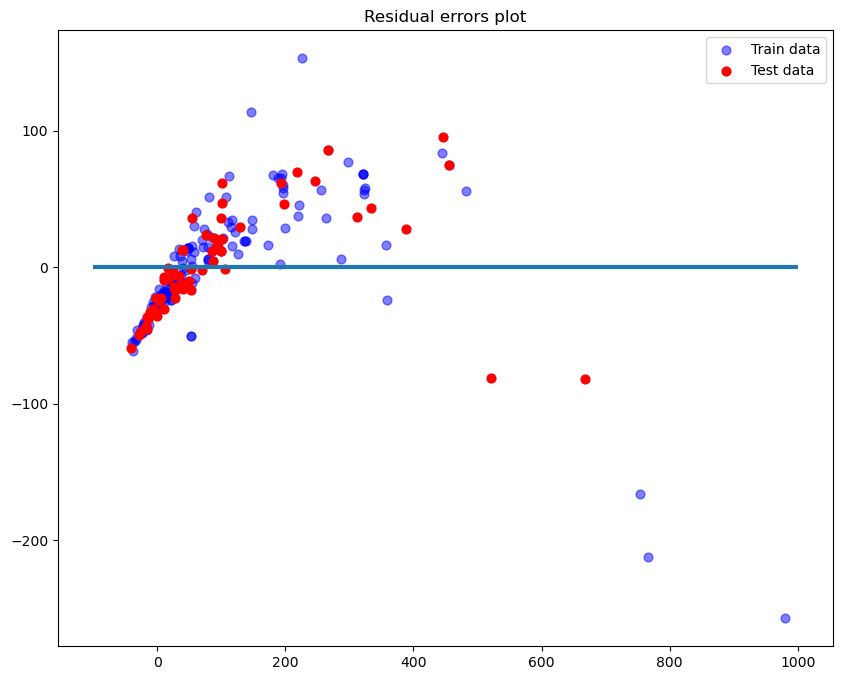

In [56]:
plt.figure(figsize=(10,8))
plt.figure(figsize=(10,8))

# plotting residual errors in training data
plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c = 'b', s = 40, label = 'Train data', alpha = 0.5)

# plotting residual errors in test data
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c = 'r', s = 40, label = 'Test data')


plt.hlines(y = 0, xmin = -100, xmax = 1000, linewidth = 3)


plt.legend(loc = 'upper right')

plt.title("Residual errors plot")


plt.show()

A regression model that has nicely fit the data will have its residuals display randomness (i.e., lack of any pattern). Any pattern in the scatter-plot, results in a violation of this property and points towards a poor fitting model.

Residual errors plot show that the data is randomly scattered around line zero. The plot does not display any pattern in the residuals. Hence, we can conclude that the Linear Regression model is a good fit to the data.

### Normality test (Q-Q Plot)

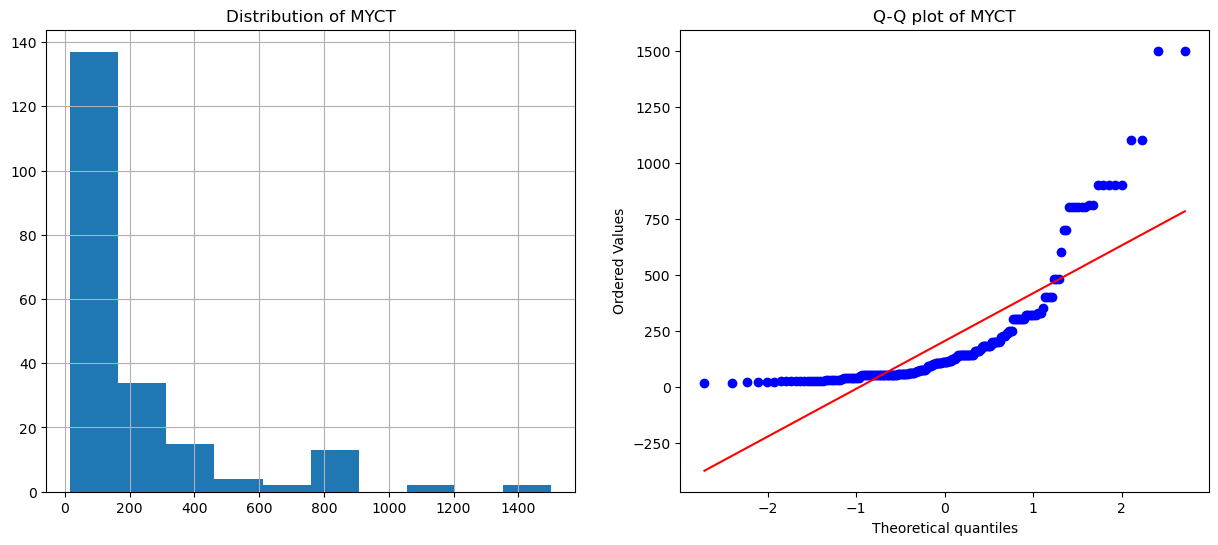

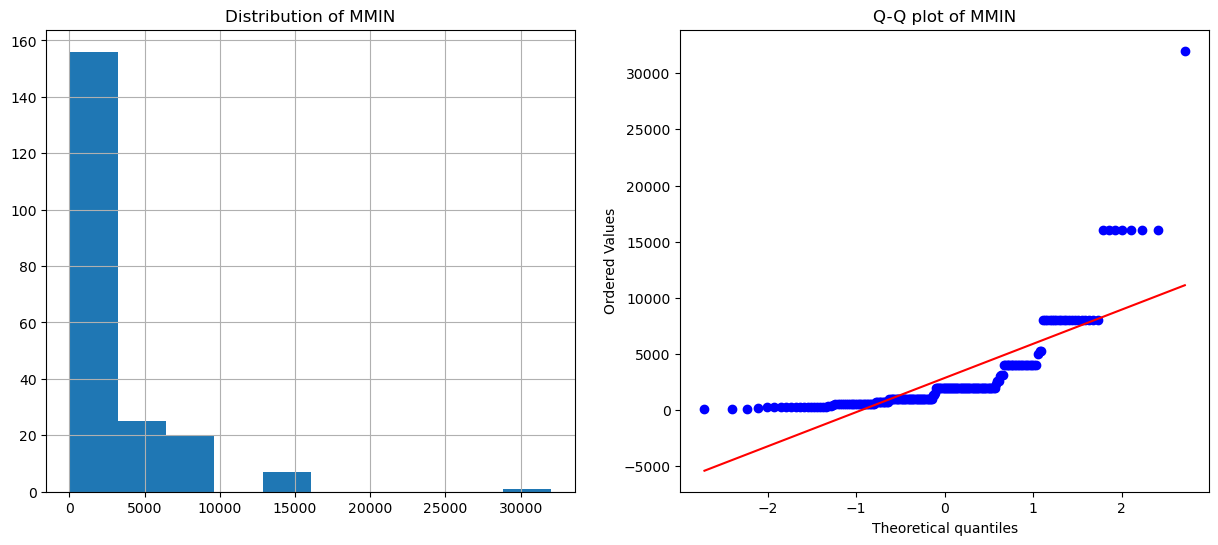

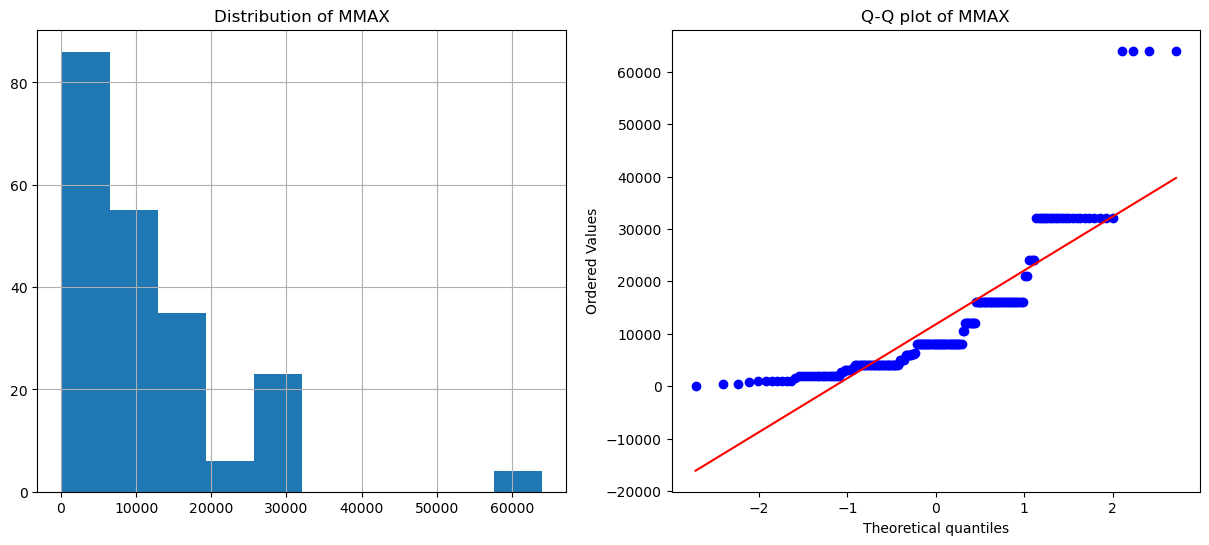

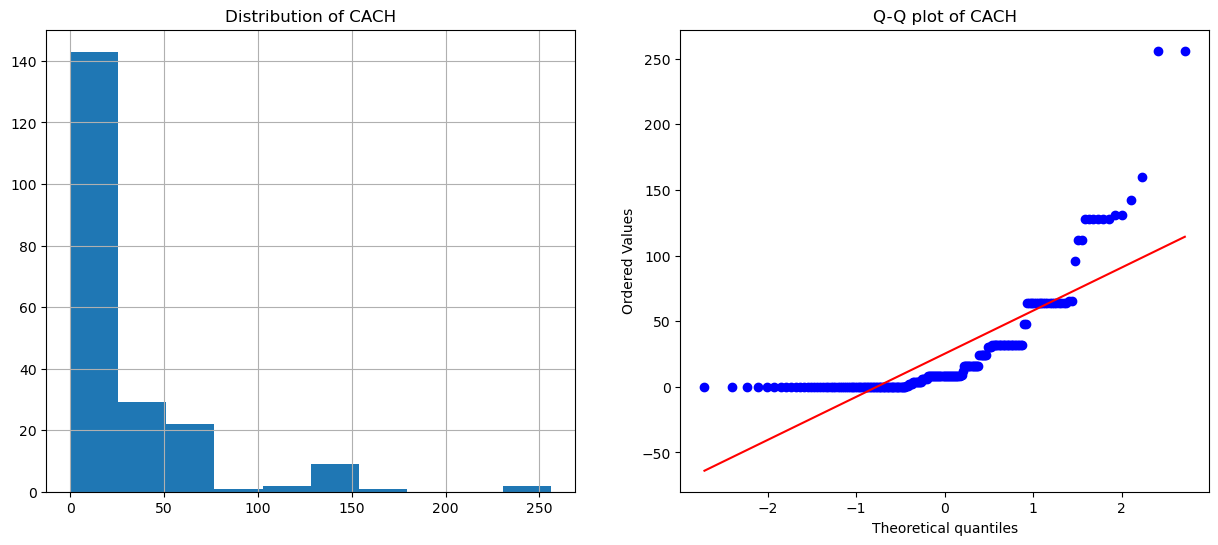

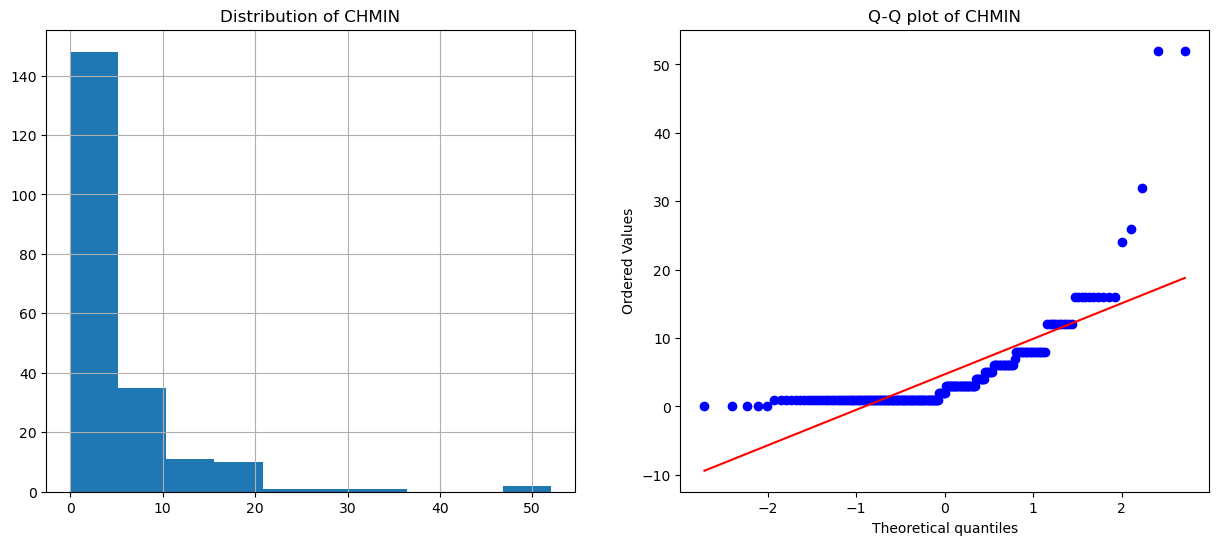

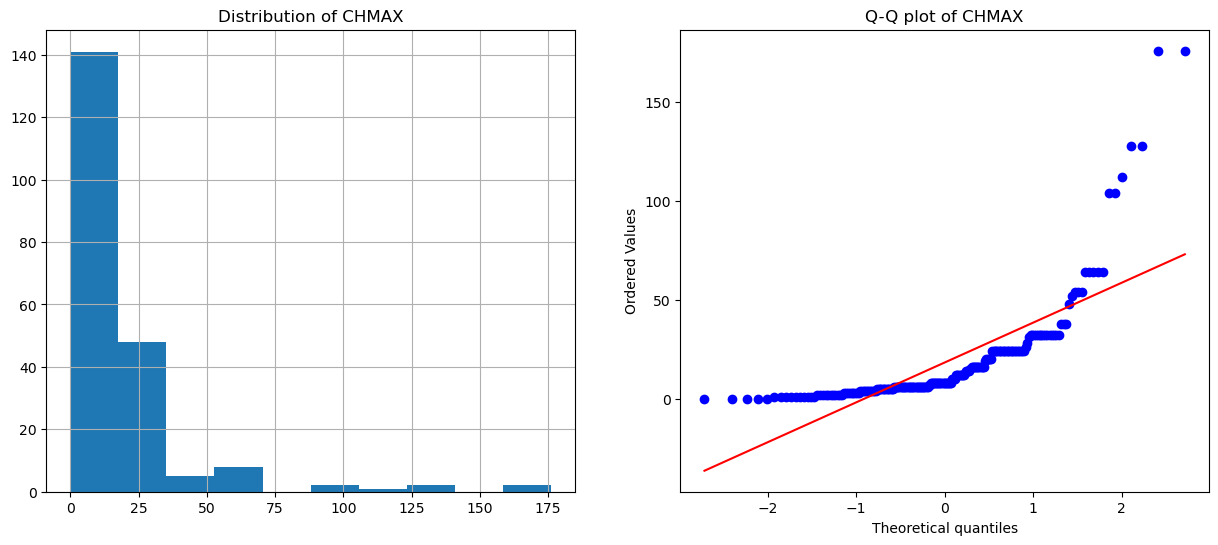

In [58]:
import pylab 
import scipy.stats as stats


for var in ['MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX']:
    
    plt.figure(figsize=(15,6))

    plt.subplot(1, 2, 1)
    df[var].hist()
    plt.title('Distribution of '+ var)

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.title('Q-Q plot of '+ var)

    plt.show() 


This test helps us identify outliers and skewness.

From the distribution plots, we can see that all the above variables are positively skewed. The Q-Q plot of all the variables confirm that the variables are not normally distributed.

Hence, the variables do not pass the normality test.